#📌 Extracão

In [ ]:
# Importando as bibliotecas usadas no projeto
import pandas as pd
import requests as re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Obtendo a base de dados da API do Github usando a bilioteca Requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = re.get(url)
data = response.json()
clientes = pd.DataFrame(data)
clientes.head()

#🔧 Transformação

In [ ]:
# Normalizando as colunas do arquivo Json e salvando no DF clientes
clientes = pd.json_normalize(data)

Conhecendo a base de dados

In [ ]:
clientes.head()

In [ ]:
clientes.info()

In [ ]:
# Verificando valores unicos das colunas excluindo colunas com muitos valores
colunas_cliente = list(clientes.columns)
colunas_remover = ['customerID', 'customer.tenure', 'Coluna: account.Charges.Monthly','Coluna: account.Charges.Total']
for coluna in colunas_cliente:
    if coluna not in colunas_remover:
        print(f'Coluna: {coluna} - Conteudo: {clientes[coluna].unique()}')
        print('-' * 50)

In [ ]:
# Verificando a existencia de dados nulos
print(f'Quantidade de clientes nulos:\n{clientes.isnull().sum()}')

Quantidade de clientes nulos:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [ ]:
# Verificando se existe valoresa duplicados
duplicados = clientes.duplicated().sum()
if duplicados:
    print(f'Quantidade de valores duplicados: {duplicados}')
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


In [ ]:
# Totais de clientes que cancelaram | não cancelaram
print(f'Total de clientes da Telecom X: {clientes['Churn'].value_counts().sum()}')
print(f'{clientes[clientes['Churn'] == 'Yes'].shape[0]} Clientes cancelaram a assinatura')
print(f'{clientes[clientes['Churn'] == 'No'].shape[0]} Clientes NÃO cancelaram a assinatura')

In [ ]:
# Percentual de clientes que cancelaram ou não o serviço
churn_percentages = clientes['Churn'].value_counts(normalize=True) * 100
print(f'Porcentagem de clientes que Cancelaram: {churn_percentages.get('Yes', 0):.2f} %')
print(f'Porcentagem de clientes que NÃO cancelaram: {churn_percentages.get('No', 0):.2f} %')

Tratando os dados

In [ ]:
# Convertendo a coluna account.Charges.Total para float
clientes['account.Charges.Total'] = pd.to_numeric(clientes['account.Charges.Total'], errors='coerce')

In [ ]:
# Convertendo a coluna customer.SeniorCitizen para Object
clientes['customer.SeniorCitizen'] = clientes['customer.SeniorCitizen'].astype(str)

In [ ]:
# Removendo Churn em branco
clientes = clientes[clientes['Churn'] != '']

In [ ]:
# Criando df somente com os clientes que cancelaram Churn=Yes
clientes_inativos = clientes[clientes['Churn'] == 'Yes']
clientes_inativos = clientes_inativos.reset_index(drop=True)
clientes_inativos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
1,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
2,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40
3,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50
4,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10


In [ ]:
# Criando a coluna Contas Diarias
clientes_inativos['account.Charges.Daily'] = clientes_inativos['account.Charges.Monthly'] / 30
clientes_inativos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
1,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
2,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667
3,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,2.090000
4,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,0.836667


In [ ]:
# excluindo as colunas customerID e Churn
clientes_inativos = clientes_inativos.drop(['customerID', 'Churn'], axis=1)
clientes_inativos.head(1)

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333


In [ ]:
# Validando a exclusão das colunas
clientes_inativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer.gender            1869 non-null   object 
 1   customer.SeniorCitizen     1869 non-null   object 
 2   customer.Partner           1869 non-null   object 
 3   customer.Dependents        1869 non-null   object 
 4   customer.tenure            1869 non-null   int64  
 5   phone.PhoneService         1869 non-null   object 
 6   phone.MultipleLines        1869 non-null   object 
 7   internet.InternetService   1869 non-null   object 
 8   internet.OnlineSecurity    1869 non-null   object 
 9   internet.OnlineBackup      1869 non-null   object 
 10  internet.DeviceProtection  1869 non-null   object 
 11  internet.TechSupport       1869 non-null   object 
 12  internet.StreamingTV       1869 non-null   object 
 13  internet.StreamingMovies   1869 non-null   objec

In [ ]:
# Renomeando as colunas para Português
colunas = {
    'customer.gender': 'Gênero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Tempo contrato',
    'phone.PhoneService': 'Serviço telefone',
    'phone.MultipleLines': 'Múltiplas linhas',
    'internet.InternetService': 'Serviço internet',
    'internet.OnlineSecurity': 'Segurança online',
    'internet.OnlineBackup': 'Backup online',
    'internet.DeviceProtection': 'Proteção dispositivo',
    'internet.TechSupport': 'Suporte técnico',
    'internet.StreamingTV': 'Streaming TV',
    'internet.StreamingMovies': 'Streaming filmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura digital',
    'account.PaymentMethod': 'Forma pagamento',
    'account.Charges.Monthly': 'Fatura mensal',
    'account.Charges.Daily': 'Fatura diária',
    'account.Charges.Total': 'Fatura total'
}
clientes_inativos = clientes_inativos.rename(columns= colunas)

In [ ]:
# Validando a alteação dos nomes das colunas
clientes_inativos.head(1)

In [ ]:
# Alterar o valor da coluna 'Idoso' para 'Yes e No' no DF Clientes e demais colunas para Português
clientes_inativos['Idoso'] = clientes_inativos['Idoso'].replace({'1': 'Sim', '0': 'Não'})
clientes_inativos['Gênero'] = clientes_inativos['Gênero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
clientes_inativos['Parceiro'] = clientes_inativos['Parceiro'].replace({'Yes': 'Sim', 'No': 'Não'})
clientes_inativos['Dependentes'] = clientes_inativos['Dependentes'].replace({'Yes': 'Sim', 'No': 'Não'})
clientes_inativos['Serviço telefone'] = clientes_inativos['Serviço telefone'].replace({'Yes': 'Sim', 'No': 'Não'})
clientes_inativos['Múltiplas linhas'] = clientes_inativos['Múltiplas linhas'].replace({'No': 'Não', 'Yes': 'Sim', 'No phone service': 'Sem serviço de telefone'})
clientes_inativos['Serviço internet'] = clientes_inativos['Serviço internet'].replace({'Fiber optic': 'Fibra', 'DSL': 'Banda Larga', 'No': 'Sem serviço de Internet'})
clientes_inativos['Contrato'] = clientes_inativos['Contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Anual', 'Two year': 'Bienal'})
clientes_inativos['Fatura digital'] = clientes_inativos['Fatura digital'].replace({'Yes': 'Sim', 'No': 'Não'})
clientes_inativos['Forma pagamento'] = clientes_inativos['Forma pagamento'].replace({'Electronic check': 'Cheque eletrônico', 'Mailed check': 'Cheque impresso', 'Bank transfer (automatic)': 'Debito automatico', 'Credit card (automatic)': 'Cartão de crédito'})


In [ ]:
colunas_traduzir = ['Segurança online', 'Backup online', 'Proteção dispositivo', 'Suporte técnico', 'Streaming TV', 'Streaming filmes']
mapping = {'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'}
for col in colunas_traduzir:
    clientes_inativos[col] = clientes_inativos[col].replace(mapping)

In [ ]:
# Validando as alterações
clientes_inativos.head(10)

,Gênero,Idoso,Parceiro,Dependentes,Tempo contrato,Serviço telefone,Múltiplas linhas,Serviço internet,Segurança online,Backup online,Proteção dispositivo,Suporte técnico,Streaming TV,Streaming filmes,Contrato,Fatura digital,Forma pagamento,Fatura mensal,Fatura total,Fatura diária
0,Masculino,Não,Não,Não,4,Sim,Não,Fibra,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.463333
1,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.266667
2,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque impresso,83.90,267.40,2.796667
3,Masculino,Sim,Não,Não,45,Sim,Não,Banda Larga,Sim,Não,Sim,Não,Não,Sim,Anual,Não,Cartão de crédito,62.70,2791.50,2.090000
4,Masculino,Sim,Não,Não,1,Não,Sem serviço de telefone,Banda Larga,Não,Não,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,25.10,25.10,0.836667
5,Feminino,Não,Sim,Não,13,Sim,Sim,Fibra,Não,Sim,Sim,Não,Sim,Não,Mensal,Não,Cheque eletrônico,94.10,1215.60,3.136667
6,Feminino,Não,Sim,Sim,4,Sim,Não,Sem serviço de Internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Mensal,Não,Cheque impresso,20.35,76.35,0.678333
7,Feminino,Não,Sim,Sim,1,Não,Sem serviço de telefone,Banda Larga,Sim,Não,Não,Não,Não,Não,Mensal,Não,Debito automatico,30.50,30.50,1.016667
8,Masculino,Sim,Não,Não,2,Sim,Não,Banda Larga,Sim,Não,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,49.25,91.10,1.641667
9,Masculino,Não,Não,Não,40,Sim,Sim,Fibra,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cartão de crédito,104.50,4036.85,3.483333


#📊 Carga e análise

Análise Descritiva

In [ ]:
# Informações dos clientes que cancaelaram a assinatura - colunas Quantitativas (Numéricas)
clientes_inativos.describe().T

,count,mean,std,min,25%,50%,75%,max
Tempo contrato,1869.0,17.979133,19.531123,1.000000,2.000000,10.000,29.00,72.000
Fatura mensal,1869.0,74.441332,24.666053,18.850000,56.150000,79.650,94.20,118.350
Fatura total,1869.0,1531.796094,1890.822994,18.850000,134.500000,703.550,2331.30,8684.800
Fatura diária,1869.0,2.481378,0.822202,0.628333,1.871667,2.655,3.14,3.945


Resumo:


1. Tempo de contrato: Variando de 1 a 72 meses, com média de 17.97
2. Fatura mensal: Com valores iniciando em 18,85 e chegando a 118,35 reais, com média de 74,44 reais
3. Fatura diária: Média de gasto diário de 2,48 reais
4. Fatura total: Com valores entre 18,85 a 8.684,80 e média de 1.531,79 reais


In [ ]:
# Informações dos clientes que cancaelaram a assinatura -Colunas Qualitativas (Categóricas)
clientes_inativos.describe(include='object').T
#print(clientes_inativos.describe(include='object').T)

,count,unique,top,freq
Gênero,1869,2,Feminino,939
Idoso,1869,2,Não,1393
Parceiro,1869,2,Não,1200
Dependentes,1869,2,Não,1543
Serviço telefone,1869,2,Sim,1699
Múltiplas linhas,1869,3,Sim,850
Serviço internet,1869,3,Fibra,1297
Segurança online,1869,3,Não,1461
Backup online,1869,3,Não,1233
Proteção dispositivo,1869,3,Não,1211


In [ ]:
# mostrar o percentual de cancelamento por cada coluna
genero_percentages = clientes_inativos['Gênero'].value_counts(normalize=True) * 100
print('Percentual de cancelamento por Gênero:')
for genero, percentage in genero_percentages.items():
    print(f'{genero}: {percentage:.2f}%')

Percentual de cancelamento por Gênero:
Feminino: 50.24%
Masculino: 49.76%


Resumo:

Dos clientes que cancelaram a assintura a maioria é do sexo feminino, com menos de 60 anos, sem parceiros e sem dependentes, com assinatura mensal, que recebem a fatura por meio digital e pagam com cheque eletronico.

São assinante dos servicos:

Serviçõs de telefonia, intgernet port fibra ótica, não possuem serviços de segurança e backup online, protecao dos dispositivos nem suporte técnico.



In [ ]:
# Grafico comparativo de cancelamentos usando a biblioteca Matplotlib
plt.figure(figsize=(12, 8))
churn_counts = clientes['Churn'].value_counts()

ax = churn_counts.plot(kind='bar')
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Cancelamento ')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)

for i, churn_type in enumerate(churn_counts.index):
    percentage = churn_percentages.loc[churn_type]
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

Resumo:

Do total 7043 clientes:

5174 Clientes que corresponde a 71,20% NÃO cancelaram a assinatura

1869 Clientes que corresponde a 25,72% Cancelaram a assinatura

In [ ]:
# Gerando gráfico das colunas numéricas usando a biblioteca Plotly
colunas_numericas = ['Tempo contrato', 'Fatura mensal', 'Fatura total', 'Fatura diária']
for coluna in colunas_numericas:
    grafico = px.histogram(clientes_inativos, x=coluna)
    grafico.show()

In [ ]:
# Criando lista de colunas categóricas para geração dos gráficos.
colunas_categoricas = ['Gênero', 'Idoso', 'Parceiro', 'Dependentes', 'Serviço telefone',
                 'Múltiplas linhas', 'Serviço internet', 'Segurança online', 'Backup online', 'Proteção dispositivo',
                 'Suporte técnico', 'Streaming TV', 'Streaming filmes', 'Contrato',
                 'Fatura digital', 'Forma pagamento']

Resumo

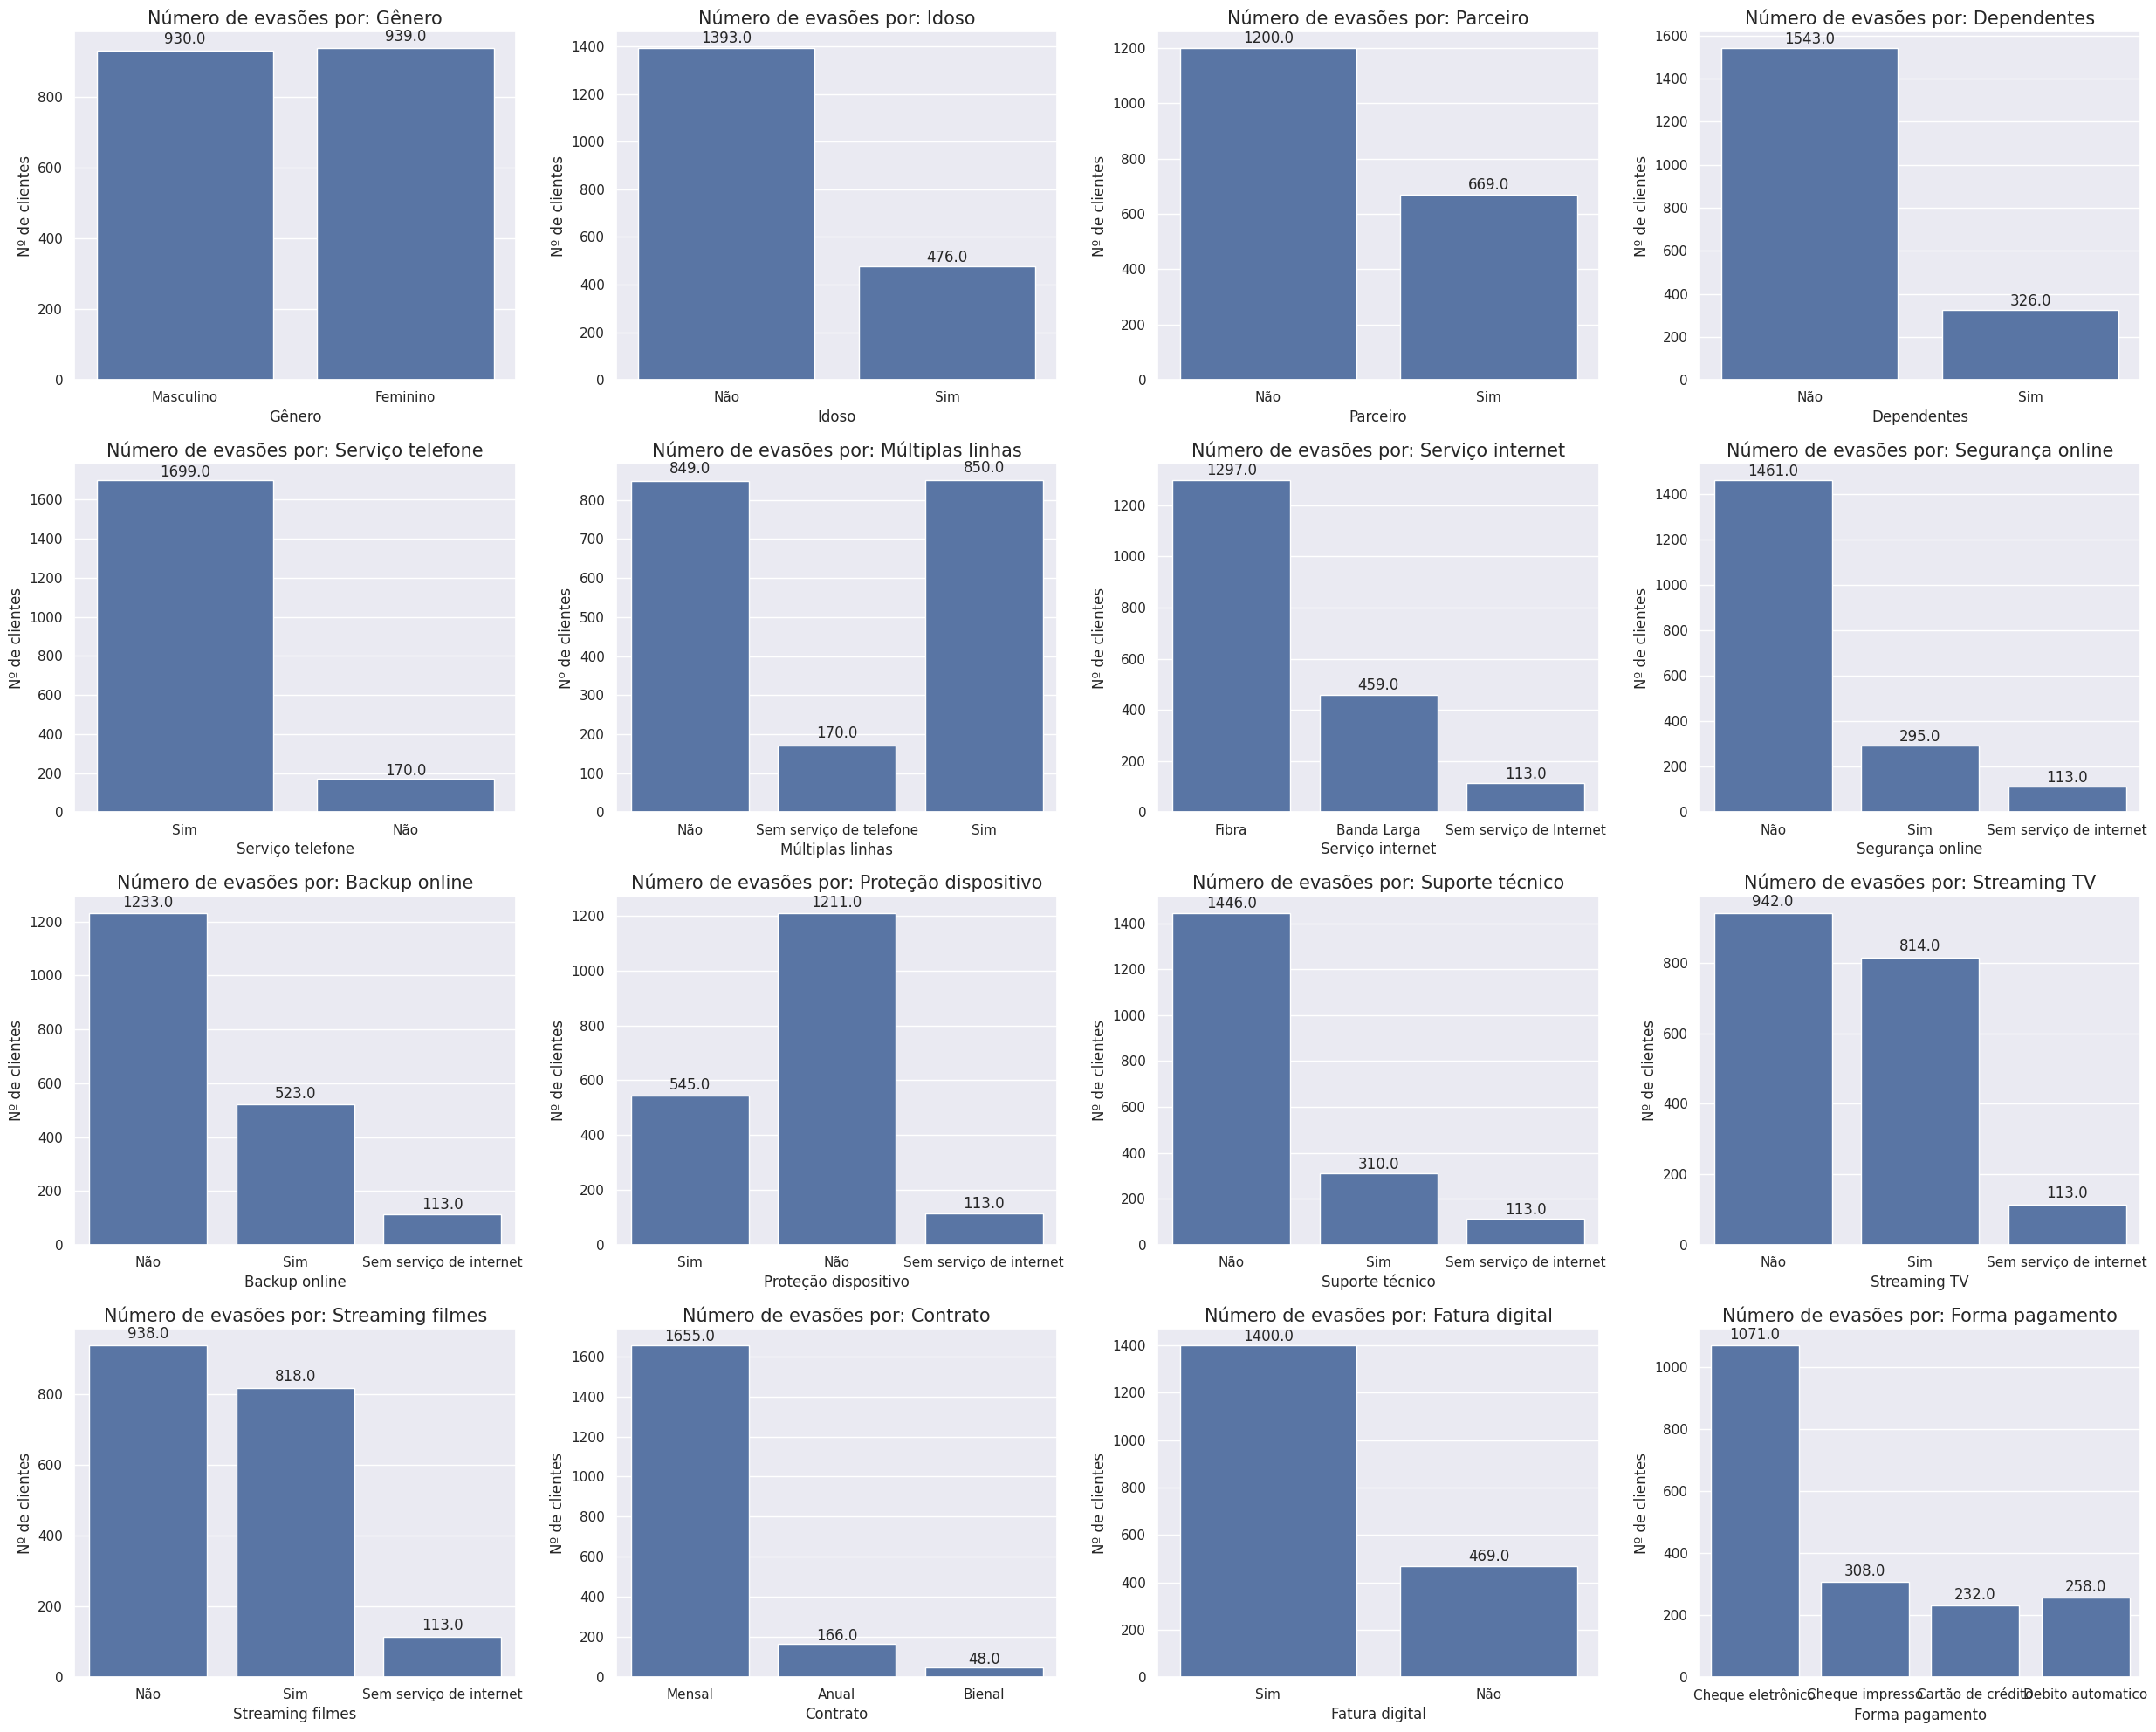

In [ ]:
# Graficos das colunas categóricas usando a Biblioteca Seaborn
sns.set(rc = {'figure.figsize':(25,20)})
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
axes = axes.flatten()

for idx, col in enumerate(colunas_categoricas):
    if idx < len(axes):
        ax = axes[idx]
        sns.countplot(data = clientes_inativos,
                        x = col,
                        ax = ax
                      )

        ax.set_title(f'Número de evasões por: {col}', fontsize = 15)
        ax.set_ylabel('Nº de clientes', fontsize = 12)
        ax.set_xlabel(col, fontsize = 12)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:1}'.format((height)),
            ha='center',
            size = 12)
    else:
        print(f"Skipping plot for column '{col}' as no more subplots are available.")

plt.tight_layout()
plt.show()

#📄Relatorio Final

# **Relatório final**

**Introdução:**

A empresa Telecom X está com alto índice de cancelamento, o objetivo desse desafio/projeto a analisar a base de dados e encontrar as causas dos cancelamentos e sugerir ações para reduzir a evasão.
A análise foi realizada no Google colab, usando Python e as bibliotecas, Requests, Pandas, Numpy, Matplotlib, Seaborn e Plotly

##Processos:

##Extração:

Importação dos dados em formato JSON via API do Github, usando a biblioteca Requests

##Transformação:


Normalização dos dados com Pandas (pd.json_normalize())

Correção dos tipos de dados para inteiros, float e datetime quando necessário.

Analise de valores nulos, em branco e duplicado, corrigindo se necessário.

Criação de um novo dataframe comente com os clientes que cancelaram a assinatura.

Tradução dos nomes das colunas e dos dados para Português.


##Carga e Análise descritiva:


**Colunas numéricas** – Análise dos valores mínimo, máximo e médias

1.	Tempo de contrato: Variando de 1 a 72 meses, com média de 17.97
2.	Fatura mensal: Com valores iniciando em 18,85 e chegando a 118,35 reais, com média de 74,44 reais
3.	Fatura diária: Média de gasto diário de 2,48 reais
4.	Fatura total: Com valores entre 18,85 a 8.684,80 e média de 1.531,79 reais

**Colunas categóricas** – Analise das características dos clientes e sua possível influencia no cancelamento:

1.	Dos clientes que cancelaram a assinatura tem menos de 60 anos, sem parceiros e sem dependentes, com assinatura mensal, que recebem a fatura por meio digital e pagam com cheque eletrônico.
2.	São assinante dos serviços:
Serviços de telefonia, internet por fibra ótica
3.	Não possuem serviços de segurança e backup online, proteção dos dispositivos nem suporte técnico.




## Gráficos:

Criação de três gráficos de barras:


1º Gráfico com dados da base completa, comparando clientes que cancelaram ou mantiveram a assinatura do serviço.
Total de clientes, quantidade e percentuais de permanência e cancelamento:

*   Total de clientes na base de dados: 7043
*   5174 Clientes que correspondem a 71,20% NÃO cancelaram a assinatura
*   1869 Clientes que correspondem a 25,72% Cancelaram a assinatura

"Alguns especialistas, como a Bessemer Venture Partners, sugerem que taxas anuais entre 5% e 7% são um bom resultado para empresas de software"


2ª gráfico apenas com os clientes que cancelaram a assinatura, analisando as colunas numéricas e sua influência no cancelamento.

*   Tempo de contrato – Clientes com até cinco meses de assinatura tendem a cancelar.
*   Fatura mensal – Clientes com fatura entre 75,00 e 105,0 reais tendem a cancelar
*   Fatura total – Clientes com fatura total até 200,00 reais tendem a cancelar
*   Fatura diária – Gerou resultados muito dispersos e não foi usada na análise
*   Item da lista


3º gráfico apenas com os clientes que cancelaram a assinatura, analisando as colunas categóricas comparando as características dos clientes e os serviços contratados.

Apenas em relação do gênero e ao serviço de múltiplas linhas os valores são muito próximos.

Os maiores índices de cancelamento estão entre as pessoas com menos de 60 anos, que não tem parceiros ou dependentes, com fatura digital, contrato mensal e serviços de telefonia e internet por fibra ótica.

Clientes que não possuem serviços acionais como backup e segurança online e proteção de dispositivos também apresentam número de cancelamentos elevado.

Clientes que possuem serviços de streaming de TV e filmes não exercem nenhuma influência no número de cancelamentos da assinatura dos serviços.


Recomendações:


*   Contrato mensal tem o maior índice de cancelamento – criar campanha de assinatura anual ou bianual com descontos pode reduzir o cancelamento.
*   Tipo de pagamento e de envio da fatura impactam fortemente no cancelamento – consultar o cliente sobre novas formas de pagamento ou envio da fatura.
*   Serviços adicionais (suporte, segurança, backup) reduzem cancelamento -  incentivar pacotes completos.
*   Clientes com menos de 60 anos sem parceiro/dependentes são mais propensos a cancelar, campanhas de retenção personalizadas podem ajudar.
*   Serviço de telefonia e internet por fibra ótica com alto indice de evasão -  revisar estratégia de preços e serviços oferecidos.
*   Streaming ajuda a manter clientes -  focar na oferta de entretenimento como forma de fidelização.

